In [1]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Cargar el conjunto de datos
housing = fetch_california_housing()

In [3]:
#Crear el conjunto de datos de de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)


print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)


X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


In [4]:
#Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)


In [5]:
#Crear modelo de red neuronal:
model =keras.models.Sequential([
keras.layers.Dense(30, activation='relu',
input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

In [6]:
#Compilar el modelo
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[keras.metrics.RootMeanSquaredError(),
                       'mean_absolute_percentage_error'])

In [8]:
#Entrenar el modelo
history =model.fit(X_train, y_train,
                   epochs=10,
                   validation_data=(X_valid, y_valid))


Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4126 - root_mean_squared_error: 0.6423 - mean_absolute_percentage_error: 25.7427 - val_loss: 0.4106 - val_root_mean_squared_error: 0.6408 - val_mean_absolute_percentage_error: 26.3630
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4098 - root_mean_squared_error: 0.6402 - mean_absolute_percentage_error: 25.4761 - val_loss: 0.4150 - val_root_mean_squared_error: 0.6442 - val_mean_absolute_percentage_error: 25.9708
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4085 - root_mean_squared_error: 0.6391 - mean_absolute_percentage_error: 25.4953 - val_loss: 0.4120 - val_root_mean_squared_error: 0.6419 - val_mean_absolute_percentage_error: 27.8613
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3998 - root_mean_squared_error: 0.6323 - mean_absolute_percentage_error: 25.2145 - val_loss: 0.4046 - val_root_mean_squared_error: 0.6361 - val_

<Axes: >

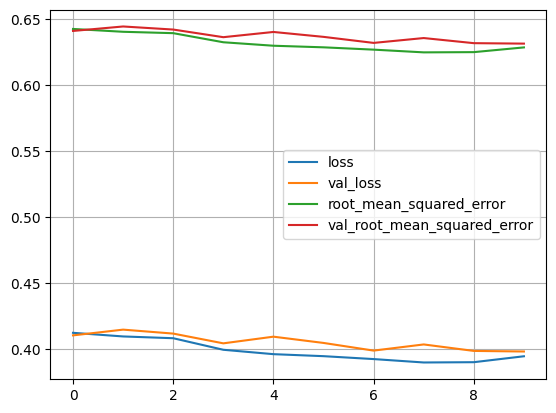

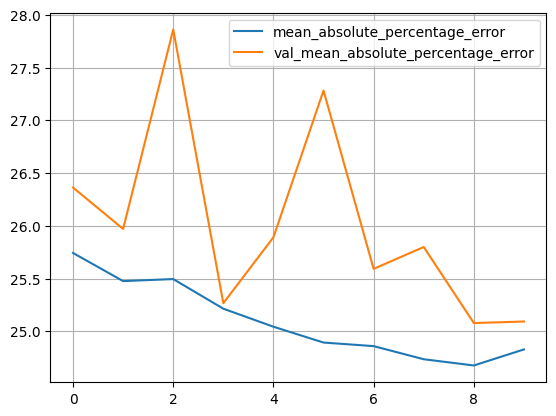

In [9]:
#Graficar el historial de entrenamiento
dfHistory = pd.DataFrame (history.history)
dfHistory [['loss', 'val_loss', 'root_mean_squared_error',
            'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error',
           'val_mean_absolute_percentage_error']].plot(grid=True)


In [10]:

#Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE =model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)
print("root_mean_squared_error train:", RMSE)
print("mean_absolute_percentage_error train:", MAPE)

#Evaluar el modelo en el conjunto de validacion
loss, RMSE, MAPE =model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid:", loss)
print("root_mean_squared_error valid:", RMSE)
print("mean_absolute_percentage_error valid:", MAPE)

#Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE =model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)
print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)



363/363 [==============================] - 0s 942us/step - loss: 0.3907 - root_mean_squared_error: 0.6251 - mean_absolute_percentage_error: 23.5804
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.3906939625740051
root_mean_squared_error train: 0.625055193901062
mean_absolute_percentage_error train: 23.580402374267578
121/121 [==============================] - 0s 902us/step - loss: 0.3985 - root_mean_squared_error: 0.6312 - mean_absolute_percentage_error: 25.0928
Evaluar el modelo en el conjunto de validación
loss valid: 0.3984534740447998
root_mean_squared_error valid: 0.6312317252159119
mean_absolute_percentage_error valid: 25.092775344848633
162/162 [==============================] - 0s 1ms/step - loss: 0.3820 - root_mean_squared_error: 0.6181 - mean_absolute_percentage_error: 23.8372
Evaluar el modelo en el conjunto de prueba
loss test: 0.382013738155365
root_mean_squared_error test: 0.6180726289749146
mean_absolute_percentage_error test: 23.837203979492188
